# Project: Wrangling and Analyze Data

## Data Gathering


In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import requests
import json
import os
import re

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Reading the twitter archive dataset from my local folder
os.chdir(r"C:\Users\RICHARD\Desktop\DS\Data Sets")
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Accessing the tsv file from the url
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Writing the response to a tsv file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Putting the content of the file into a DataFrame
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

3. Get additional data from tweet_json.txt

In [4]:
twitter_list = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet_json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count']})                        

In [5]:
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data



In [6]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
twitter_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [12]:
# Checking for duplicates columns across all data sets
all_columns = pd.Series(list(twitter_archive) + list(image_prediction) + list(twitter_data))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [13]:
pd.set_option('display.max_colwidth', 200)
twitter_archive[['text', 'expanded_urls']]

,text,expanded_urls
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1"
...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1


In [14]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
twitter_archive.name.value_counts().head(50)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Name: name, dtype: int64

In [16]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [17]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [18]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [19]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [20]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [21]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [22]:
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [23]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [24]:
twitter_data.retweet_count.unique()

array([8853, 6514, 4328, ...,  879,   41,  147], dtype=int64)

In [25]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality issues
#### `twitter_archive` table
1. Retweet and reply observations not needed
2. Erroneous datatypes( tweet_id and timestamp)
3. Source is html tag
4. Duplicated tweet_ids
5. The expanded_url has missing URLs
6. Inconsistencies with dog names(a, an, all) for instance are not dog names
7. `text` column with url



#### `image_prediction` table
8. Erroneous datatype(tweet_id)


### Tidiness issues
#### `archive_data` table
9. Dog stages has separated columns( doggo, floofer, pupper, and puppo)

#### `image_prediction` table
10.
- Dog prediction also spread in different columns(p1, p2 and p3)
- Confidence level of prediction of dog images in different columns(p1_conf, p2_conf, and p3_conf)
- Whether the prediction is dog or not is spread across different columns(p1_dog, p2_dog and p3_dog)
- img_nums not necessary for the analysis

## Cleaning Data


In [27]:
# Make copies of original pieces of data
archive_clean = twitter_archive.copy()
image_pred_clean = image_prediction.copy()
twitter_data_clean = twitter_data.copy()

### Issue 1:Retweet and reply observations not needed

#### Define:
Drop `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_status_to_status_id`, `in_reply_to_user_id`

#### Code

In [28]:
drop_columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
           'in_reply_to_status_id', 'in_reply_to_user_id']

for col in drop_columns:
    archive_clean.drop(col, axis =1, inplace =True)

#### Test

In [29]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue 2: Erroneous datatypes( tweet_id and timestamp) in archive_clean and tweet_id in image_pred_clean

#### Define:
Convert erroneous datatypes using pandas `to_datetime` and `astype functions`

#### Code

In [30]:
# Convert the timestamp column to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

# Convert the tweet_id in archive_clean and image_pred_clean to string
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(str)

#### Test

In [31]:
# Confirm that the timestamp has changed
type(archive_clean.timestamp[0]) == pd.Timestamp

True

In [32]:
# Check if the tweet_id in archive_clean is str
type(archive_clean.tweet_id[0]) is str

True

In [33]:
# Check if the tweet_id in image_pred_clean is str
assert type(image_pred_clean.tweet_id[0]) is str

### Issue 3: Source is html tag

#### Define:
Use pandas `str.extract` to remove the html to access only the source

#### Code

In [34]:
archive_clean.source = archive_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [35]:
archive_clean.source.sample(5)

167     Twitter for iPhone
245     Twitter for iPhone
543     Twitter for iPhone
1849    Twitter for iPhone
1643    Twitter for iPhone
Name: source, dtype: object

### Issue 4: Duplicate `tweet_id`

#### Define:
Remove the duplicate tweet ids using pandas `.duplicated()` fucntion

#### Code

In [36]:
archive_clean = archive_clean[~(archive_clean.tweet_id.duplicated())]

#### Test

In [37]:
sum(archive_clean.tweet_id.duplicated())

0

### Issue 5:The expanded_url has missing URLs

#### Define
Take the rows where `expanded_url` is not NAN using `notna()` function

#### Code

In [38]:
archive_clean = archive_clean[archive_clean['expanded_urls'].notna()]

#### Test

In [39]:
sum(archive_clean.expanded_urls.isnull())

0

### Issue 6: Inconsistencies with dog names(a, an, all) for instance are not dog names

#### Define
All correct names of the dog in the `name` column begin with upper case. There are also `None` as a dog name in the column so change lower case names to `None`

#### Code

In [40]:
archive_clean.name = archive_clean.name.apply(lambda x : 'None' if x[0].islower() else x)

#### Test

In [41]:
archive_clean.name.value_counts().head()

None       795
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Name: name, dtype: int64

### Issue 7: `text` column with url

#### Define:
Use `re.sub()` function together with `lambda` function and apply to the `text` column
https://java2blog.com/remove-urls-from-text-python/ was useful

#### Code

In [42]:
archive_clean.text = archive_clean.text.apply(lambda x : re.sub('http[s]?://\S+', '', x).strip())

#### Test

In [43]:
archive_clean.text

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
                                                                           ...                                                                    
2351                                              Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox 

### Issue 8 has been dealt with in Issue 2

### Issue 9:  Dog stages has separated columns( doggo, floofer, pupper, and puppo)

#### Define:
Use pandas melt function to put `doogo`, `floofer`, `pupper` and `puppo` into one column named `dog_stages`

#### Code

In [44]:
archive_clean = pd.melt(archive_clean, id_vars = ['tweet_id','timestamp',
                                                 'source','text',
                                                 'expanded_urls','rating_numerator',
                                                 'rating_denominator','name'],
                       var_name='dog_stages', value_name = 'stages')
archive_clean = archive_clean.drop('stages', axis=1)

#### Test

In [45]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [46]:
archive_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
3677,698549713696649216,2016-02-13 16:50:04+00:00,Twitter for iPhone,This is Claude. He's trying to be seductive but he forgot to turn on the fireplace. 9/10 damn it Claude,https://twitter.com/dog_rates/status/698549713696649216/photo/1,9,10,Claude,floofer
2016,671109016219725825,2015-11-29 23:30:32+00:00,Twitter for iPhone,This is Toby. He asked for chocolate cake for his birthday but was given vanilla instead. 8/10 it'll be ok Toby,https://twitter.com/dog_rates/status/671109016219725825/photo/1,8,10,Toby,doggo


### Issue 10:
- Dog prediction also spread in different columns(p1, p2 and p3)
- Confidence level of prediction of dog images in different columns(p1_conf, p2_conf, and p3_conf)
- Whether the prediction is dog or not is spread across different columns(p1_dog, p2_dog and p3_dog)
- img_nums not necessary for the analysis

#### Define:
Create a `def` function to produce variety of dogs and the level of confidence column

#### Code

In [47]:
# These empty list will be added to image_pred_clean as a column
dog_variety = []
confidence_level = [] 

def variety_dog(entry):
    if entry.p1_dog != False:
        dog_variety.append(entry.p1)
        confidence_level.append(entry.p1_conf)
    elif entry.p2_dog != False:
        dog_variety.append(entry.p2)
        confidence_level.append(entry.p2_conf)
    elif entry.p3_dog != False:
        dog_variety.append(entry.p3)
        confidence_level.append(entry.p3_conf)
        
    # If non of the above conditions are not met then the it means the algorithm
    # was not able to predict the variety of dog. Hence execute the code below
    else:
        dog_variety.append('Unpredicted')
        # If unpredicted, then the confidence level is 0
        confidence_level.append(0)
        
# Let apply the function to image_pred_clean
image_pred_clean.apply(variety_dog, axis =1)

# Now add the list to image_pred_clean
image_pred_clean['dog_variety'] = dog_variety
image_pred_clean['confidence_level'] = confidence_level

    

In [48]:
# The function created is replaced by p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'
# These columns can now be dropped.The img_num is not necessary in our analysis so it can also be dropped
image_pred_clean.drop(columns = ['img_num','p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog','p3', 'p3_conf', 'p3_dog'], inplace =True)

#### Test

In [49]:
image_pred_clean.head()

,tweet_id,jpg_url,dog_variety,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [50]:
archive_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
119,868880397819494401,2017-05-28 17:23:24+00:00,Twitter for iPhone,This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter,https://twitter.com/dog_rates/status/868880397819494401/photo/1,14,10,Walter,doggo
7112,847842811428974592,2017-03-31 16:07:33+00:00,Twitter for iPhone,"This is Rontu. He is described as a pal, cuddle bug, protector and constant shadow. 12/10, but he needs your help","https://www.gofundme.com/help-save-rontu,https://twitter.com/dog_rates/status/847842811428974592/photo/1",12,10,Rontu,puppo


### The `rating_numerator` and `rating_denominator` can be used to create a `rating` column for better analysis. To get the `rating` column we need to divide the `rating_numerator` by the `rating_denominator`

In [51]:
# Create a rating column
archive_clean['total_rating'] = archive_clean['rating_numerator']/archive_clean['rating_denominator']

In [52]:
archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,total_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,doggo,1.3


https://www.stackvidhya.com/change-order-of-columns-in-pandas-dataframe/ was helpful in rearranging the columns

In [53]:
# Let rearrange the columns so that the ratings will follow each other
column_names = ['tweet_id','timestamp','source','text',
               'expanded_urls','rating_numerator','rating_denominator',
               'total_rating','name','dog_stages']
archive_clean = archive_clean.reindex(columns = column_names)

In [54]:
archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,total_rating,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,1.3,Phineas,doggo


### Merging the dataset together together to into a single master dataframe

In [55]:
df = pd.merge(archive_clean, twitter_data_clean, on = 'tweet_id')

In [56]:
df = pd.merge(df, image_pred_clean, on = 'tweet_id')

In [57]:
pd.reset_option('^display.', silent=True)
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,total_rating,name,dog_stages,retweet_count,favorite_count,jpg_url,dog_variety,confidence_level
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,1.3,Phineas,doggo,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unpredicted,0.000000
1,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,1.3,Phineas,floofer,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unpredicted,0.000000
2,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,1.3,Phineas,pupper,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unpredicted,0.000000
3,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,1.3,Phineas,puppo,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unpredicted,0.000000
4,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,1.3,Tilly,doggo,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581


### Let change the `source`, `dog_stages` and `dog_variety` columns to categorical datatype

In [58]:
cols_change = ['source', 'dog_stages', 'dog_variety']
df[cols_change] = df[cols_change].astype('category')

In [59]:
# Check to see if datatype has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8292 entries, 0 to 8291
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8292 non-null   object             
 1   timestamp           8292 non-null   datetime64[ns, UTC]
 2   source              8292 non-null   category           
 3   text                8292 non-null   object             
 4   expanded_urls       8292 non-null   object             
 5   rating_numerator    8292 non-null   int64              
 6   rating_denominator  8292 non-null   int64              
 7   total_rating        8292 non-null   float64            
 8   name                8292 non-null   object             
 9   dog_stages          8292 non-null   category           
 10  retweet_count       8292 non-null   int64              
 11  favorite_count      8292 non-null   int64              
 12  jpg_url             8292 non-null 

## Storing cleaned data in `twitter_archive_master.csv` file

In [60]:
df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

Note that the analysis and visualizations will be based on the assessed and cleaned data.

In [61]:
# Packages needed for the visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
sns.set(font_scale = 1.3)

In [62]:
master_df = pd.read_csv('twitter_archive_master.csv')

In [63]:
master_df.tail(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,total_rating,name,dog_stages,retweet_count,favorite_count,jpg_url,dog_variety,confidence_level
8287,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,0.7,None,puppo,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
8288,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,0.8,None,doggo,532,2535,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
8289,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,0.8,None,floofer,532,2535,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
8290,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,0.8,None,pupper,532,2535,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
8291,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,0.8,None,puppo,532,2535,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074


In [64]:
# Merging the datatype changed the datatype of some columns
column_change = ['source', 'dog_stages', 'dog_variety']
master_df[cols_change] = master_df[cols_change].astype('category')

In [65]:
master_df.timestamp = pd.to_datetime(master_df.timestamp)

In [66]:
# Let check for duplicates tweet id
sum(master_df.tweet_id.duplicated())

6219

In [67]:
master_df.drop_duplicates(subset = ['tweet_id'],ignore_index =True, inplace =True )
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,total_rating,name,dog_stages,retweet_count,favorite_count,jpg_url,dog_variety,confidence_level
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,1.3,Phineas,doggo,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unpredicted,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,1.3,Tilly,doggo,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,1.2,Archie,doggo,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,1.3,Darla,doggo,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,1.2,Franklin,doggo,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


### To gain some insights from the cleaned data, the following questions need to be answered:
#### 1. <font color = '#FF8C00'>What is the best tweet source in terms of average retweet count and favorite count? </font>
#### 2. <font color = '#FF8C00'>Which breed or variety of dog was predicted with highest confidence level? </font>
#### 3. <font color = '#FF8C00'> What relationship exist between retweet and favorite count?</font>
#### 4. <font color = '#FF8C00'> What's the top five dog name with the highest retweet and favorite count?</font>
#### 5. <font color = '#FF8C00'> What's the most popular dog name?</font>

## 1. <font color = '#FF8C00'>What is the best tweet source in terms of average retweet count and favorite count? </font>

In [68]:
# Group the data by source of tweet
grp = master_df.groupby('source')

In [69]:
# Average retweet count and favorite count the tweet source
avg_count = grp[['retweet_count', 'favorite_count']].mean()

In [70]:
avg_count

,retweet_count,favorite_count
source,,
TweetDeck,2599.090909,5793.545455
Twitter Web Client,2441.000000,5678.066667
Twitter for iPhone,2986.030020,8614.176181


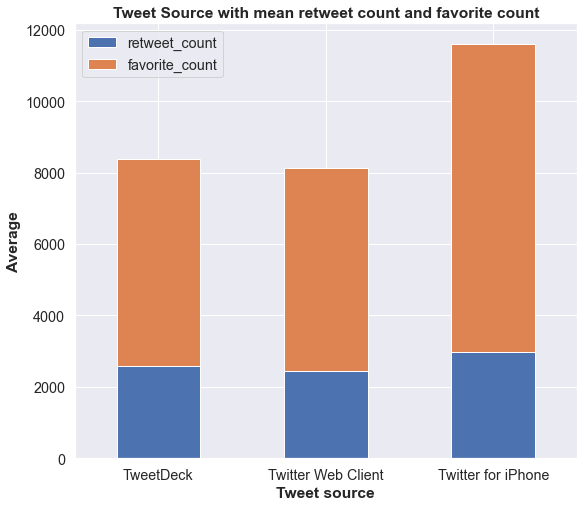

In [71]:
avg_count.plot(kind = 'bar', stacked = True, figsize = (9, 8))
plt.xticks(rotation=0)
plt.xlabel("Tweet source",fontweight = 'bold')
plt.ylabel("Average",fontweight = 'bold')
plt.title("Tweet Source with mean retweet count and favorite count",fontweight = 'bold');

## 2. <font color = '#FF8C00'>Which breed or variety of dog was predicted with highest confidence level? </font>

In [72]:
master_df.confidence_level.sort_values(ascending = False)[:5]

1923    0.999956
700     0.999953
1207    0.999885
1597    0.999876
1058    0.999837
Name: confidence_level, dtype: float64

In [73]:
# Top five confidence level
top_conf = master_df[master_df['confidence_level'] >= 0.999837]

In [74]:
top_conf

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,total_rating,name,dog_stages,retweet_count,favorite_count,jpg_url,dog_variety,confidence_level
700,762464539388485633,2016-08-08 01:44:46+00:00,Twitter for iPhone,This is Buddy. His father was a bear and his m...,https://twitter.com/dog_rates/status/762464539...,12,10,1.2,Buddy,doggo,4839,11503,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,chow,0.999953
1058,709566166965075968,2016-03-15 02:25:31+00:00,Twitter for iPhone,This is Olaf. He's gotta be rare. Seems sturdy...,https://twitter.com/dog_rates/status/709566166...,12,10,1.2,Olaf,doggo,1367,3865,https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg,chow,0.999837
1207,697463031882764288,2016-02-10 16:51:59+00:00,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44,40,1.1,None,doggo,1552,3748,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,Labrador_retriever,0.999885
1597,675149409102012420,2015-12-11 03:05:37+00:00,Twitter for iPhone,holy shit 12/10,https://twitter.com/dog_rates/status/675149409...,12,10,1.2,None,doggo,1878,4037,https://pbs.twimg.com/media/CV6czeEWEAEdChp.jpg,chow,0.999876
1923,668636665813057536,2015-11-23 03:46:18+00:00,Twitter for iPhone,This is an Irish Rigatoni terrier named Berta....,https://twitter.com/dog_rates/status/668636665...,10,10,1.0,None,doggo,528,1114,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,komondor,0.999956


### Note: Since three similar breed of dog is appearing in the top five, we can sum their confidence level to avoid repetition of the breed names. This is based on my assumption and only for the purpose of my analysis

In [75]:
breed = top_conf.groupby('dog_variety')

In [76]:
top_breed = breed['confidence_level'].sum().sort_values(ascending = False)[:3]

In [77]:
top_breed

dog_variety
chow                  2.999666
komondor              0.999956
Labrador_retriever    0.999885
Name: confidence_level, dtype: float64

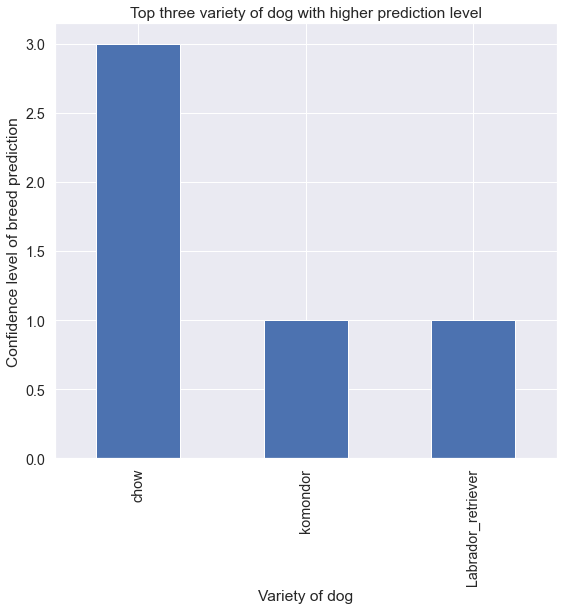

In [78]:
top_breed.plot(kind = 'bar', figsize = (9, 8))
plt.xlabel('Variety of dog')
plt.ylabel('Confidence level of breed prediction')
plt.title('Top three variety of dog with higher prediction level');

In [79]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,total_rating,name,dog_stages,retweet_count,favorite_count,jpg_url,dog_variety,confidence_level
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,1.3,Phineas,doggo,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unpredicted,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,1.3,Tilly,doggo,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,1.2,Archie,doggo,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,1.3,Darla,doggo,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,1.2,Franklin,doggo,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


## 3. <font color = '#FF8C00'> What relationship exist between retweet and favorite count?</font>

In [80]:
# Let find the correlation between retweet and favorite count
master_df[['retweet_count', 'favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.790476
favorite_count,0.790476,1.000000


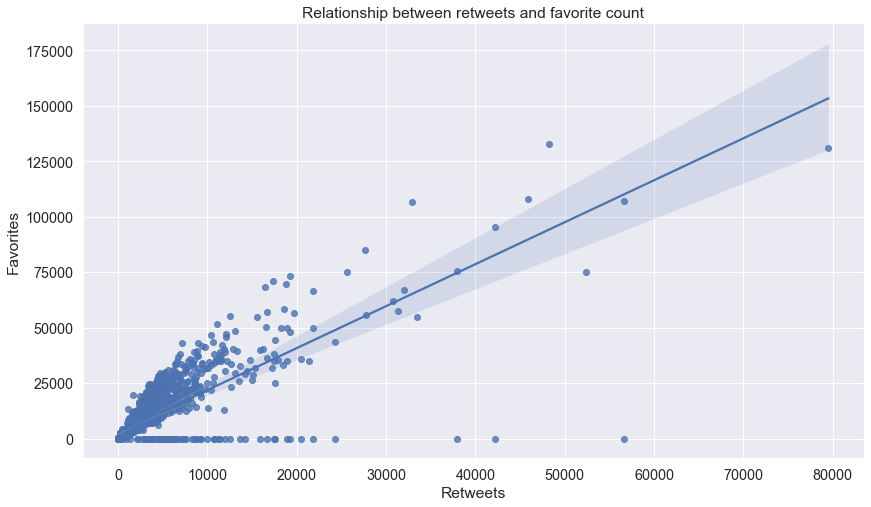

In [81]:
plt.figure(figsize=(14,8))
sns.regplot(x=master_df.retweet_count, y=master_df.favorite_count)
plt.title("Relationship between retweets and favorite count")
plt.xlabel('Retweets')
plt.ylabel('Favorites');

## 4. <font color = '#FF8C00'> What's the top five dog name with the highest retweet and favorite count?</font>

In [82]:
pop_name = master_df.groupby(['name'])[['retweet_count','favorite_count']].sum()[:5]

In [83]:
pop_name

,retweet_count,favorite_count
name,,
Abby,2753,9925
Ace,1191,3758
Acro,340,1208
Adele,842,3397
Aiden,714,1676


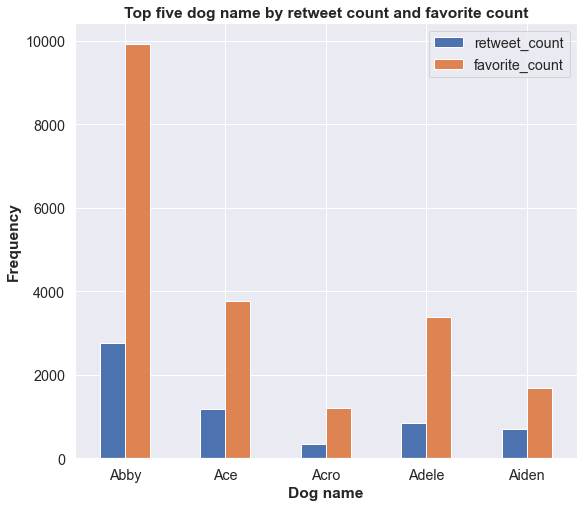

In [84]:
pop_name.plot(kind = 'bar', figsize = (9, 8))
plt.xticks(rotation=0)
plt.xlabel("Dog name",fontweight = 'bold')
plt.ylabel("Frequency",fontweight = 'bold')
plt.title("Top five dog name by retweet count and favorite count",fontweight = 'bold');

## 5. <font color = '#FF8C00'> What's the most popular dog name?</font>

In [85]:
best_DogName = master_df.name.value_counts().drop('None')[:5]

In [86]:
best_DogName

Charlie    11
Lucy       10
Oliver     10
Tucker     10
Penny      10
Name: name, dtype: int64

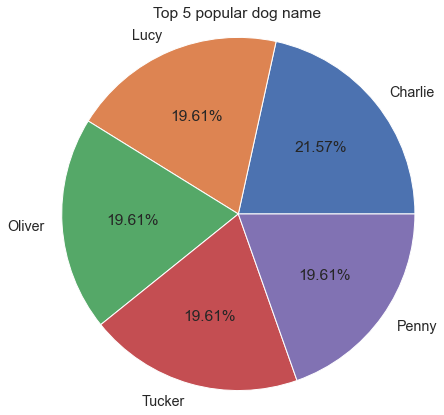

In [87]:
plt.figure(figsize = (7, 7))
plt.pie(best_DogName, labels =['Charlie','Lucy','Oliver','Tucker','Penny'] ,
        autopct = "%1.2f%%")
plt.axis("equal")
plt.title('Top 5 popular dog name')
plt.show()

### Insights:
### 1. From the analysis and visualisations it came out that *Twitter for iPhone* emerged as the best tweet source based on the average retweet and favorite count. This was followed by *TweetDeck* and *Twitter Web Client*. There is a sligth difference between *TweetDeck* and *Twitter Web Client* based on the retweet and favorite count.

### 2. All dogs of  **Chow** variety or breed was predicted with highest confidence level based on the algorithm used.

### 3. There is a positive relationship between retweet and favorite count. As more twitter users retweet a dog post the more favorites or likes it get.

### 4. Abby representing a dog name had the highest retweet and favorite count followed by Ace, Adele, Aiden, and Acro.

### 5. The most popular dog name used was `Charlie` representing 21.57% of the dog names.